In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.metrics import classification_report,confusion_matrix
from scikitplot.metrics import plot_precision_recall,plot_roc
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.combine import SMOTEENN
from collections import Counter 

In [9]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [6]:
df_1=arff.loadarff(r'C:\Users\gayat\Downloads\Autism-Adult-Data Plus Description File\Autism-Adult-Data.arff')
df_1 = pd.DataFrame(df_1[0])

In [7]:
df_1.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,b'1',b'1',b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'0',...,b'f',b'White-European',b'no',b'no',b'United States',b'no',6.0,b'18 and more',b'Self',b'NO'
1,b'1',b'1',b'0',b'1',b'0',b'0',b'0',b'1',b'0',b'1',...,b'm',b'Latino',b'no',b'yes',b'Brazil',b'no',5.0,b'18 and more',b'Self',b'NO'
2,b'1',b'1',b'0',b'1',b'1',b'0',b'1',b'1',b'1',b'1',...,b'm',b'Latino',b'yes',b'yes',b'Spain',b'no',8.0,b'18 and more',b'Parent',b'YES'
3,b'1',b'1',b'0',b'1',b'0',b'0',b'1',b'1',b'0',b'1',...,b'f',b'White-European',b'no',b'yes',b'United States',b'no',6.0,b'18 and more',b'Self',b'NO'
4,b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',b'0',...,b'f',b'?',b'no',b'no',b'Egypt',b'no',2.0,b'18 and more',b'?',b'NO'


In [11]:
#Converted arff to csv 
df=pd.read_csv(r'C:\Users\gayat\Downloads\csv_result_Autism_Adult_Data.csv')
df.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,0,40,f,?,no,no,Egypt,no,2,18 and more,?,NO


In [12]:
df.age.unique()

array(['26', '24', '27', '35', '40', '36', '17', '64', '29', '33', '18',
       '31', '30', '34', '38', '42', '43', '48', '37', '55', '50', '53',
       '20', '28', '21', '383', '47', '32', '44', '?', '19', '58', '45',
       '22', '39', '25', '23', '54', '60', '41', '46', '56', '61', '59',
       '52', '49', '51'], dtype=object)

In [13]:
df=df.replace(to_replace="?",value=" ")

In [14]:
#Replacing blanks values wrt to column 
#print(df.age.mode())
df['age']=df['age'].replace(to_replace=" ",value="21")
#print(df.ethnicity.value_counts())
df['ethnicity']=df['ethnicity'].replace(to_replace=" ",value='others')
#print(df.relation.value_counts())
df['relation']=df['relation'].replace(to_replace=" ",value='Others')

In [15]:
import pandas as pd
import plotly.express as px

<AxesSubplot:xlabel='Class/ASD', ylabel='count'>

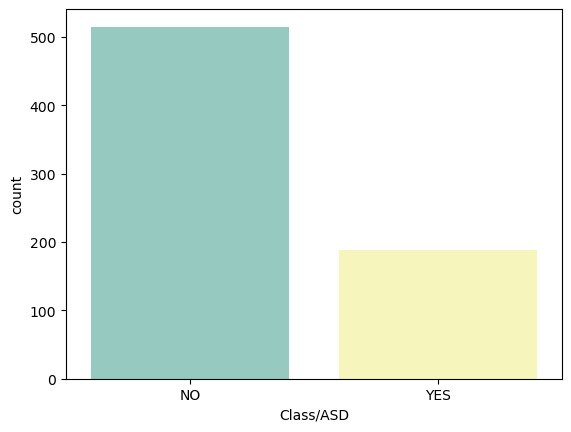

In [17]:
sns.countplot(x='Class/ASD', data=df,palette='Set3')

<AxesSubplot:xlabel='austim', ylabel='count'>

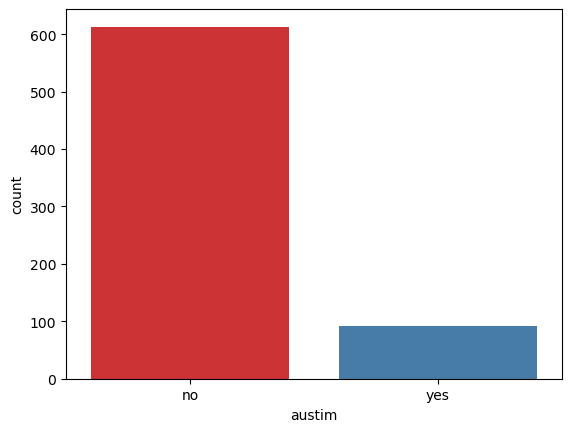

In [18]:
sns.countplot(x='austim', data=df,palette='Set1')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'White-European'),
  Text(1, 0, 'Latino'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Others'),
  Text(4, 0, 'Black'),
  Text(5, 0, 'Asian'),
  Text(6, 0, 'Middle Eastern '),
  Text(7, 0, 'Pasifika'),
  Text(8, 0, 'South Asian'),
  Text(9, 0, 'Hispanic'),
  Text(10, 0, 'Turkish')])

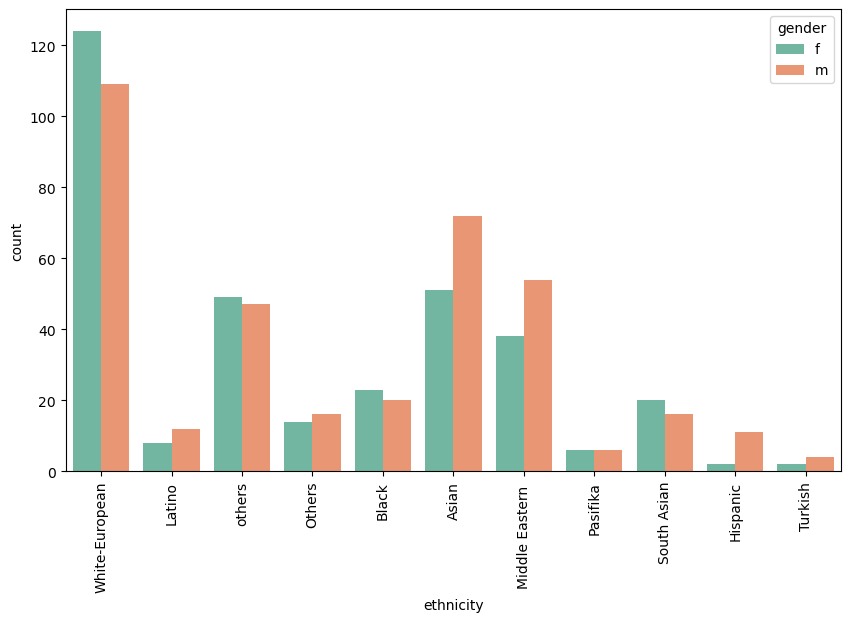

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x='ethnicity',hue='gender',data=df,palette='Set2')
plt.xticks(rotation=90)

<Figure size 1500x600 with 0 Axes>

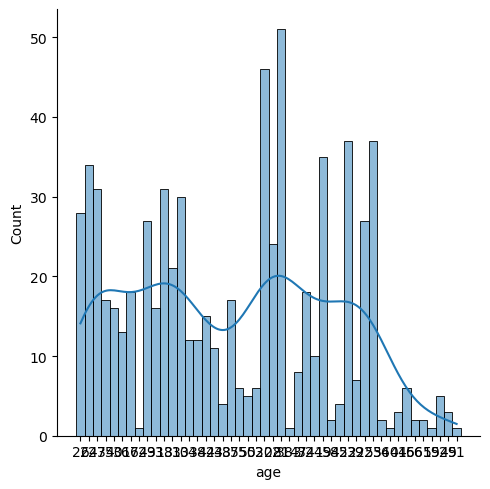

In [22]:
plt.figure(figsize=(15,6))
sns.displot(df["age"],kde=True,bins=30,palette='Red')

In [25]:
df.columns

Index(['id', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

Text(0.5, 0, 'Class/ASD')

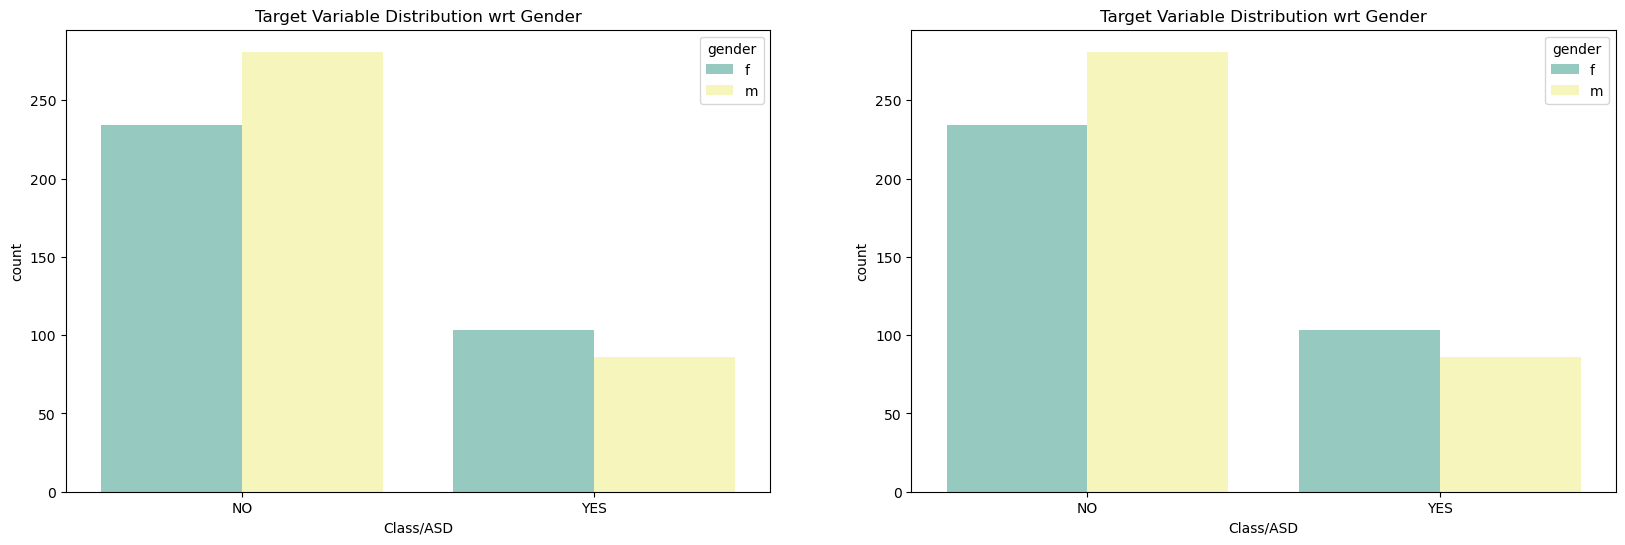

In [30]:
#birth based on gender
fig, ax = plt.subplots(1,2,figsize=(20,6))
sns.countplot(x='Class/ASD',data=df,hue='gender',ax=ax[0],palette='Set3')
ax[0].set_title('Target Variable Distribution wrt Gender')
ax[0].set_xlabel('Class/ASD')
sns.countplot(x='Class/ASD',data=df,hue='gender',ax=ax[1],palette='Set3')
ax[1].set_title('Target Variable Distribution wrt Gender')
ax[1].set_xlabel('Class/ASD')

In [31]:
df.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,0,40,f,others,no,no,Egypt,no,2,18 and more,Others,NO


<AxesSubplot:xlabel='relation', ylabel='count'>

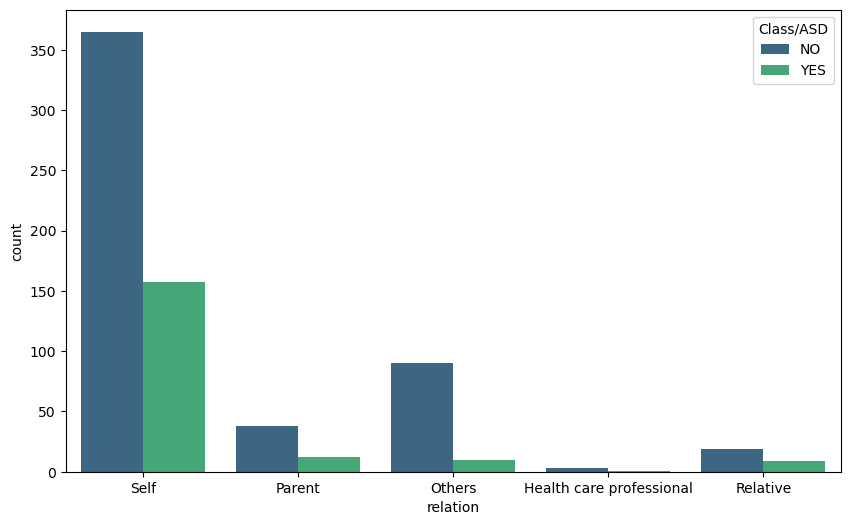

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(x='relation',hue='Class/ASD',data=df,palette='viridis')

<Figure size 1500x600 with 0 Axes>

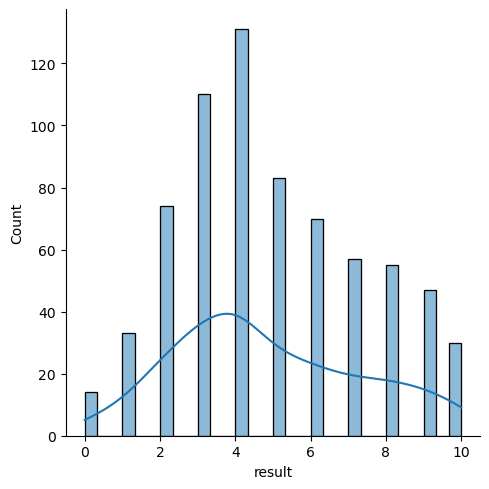

In [34]:
plt.figure(figsize=(15,6))
sns.displot(df["result"],kde=True,bins=30,palette='Red')

In [35]:
df.columns

Index(['id', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

<AxesSubplot:xlabel='gender', ylabel='count'>

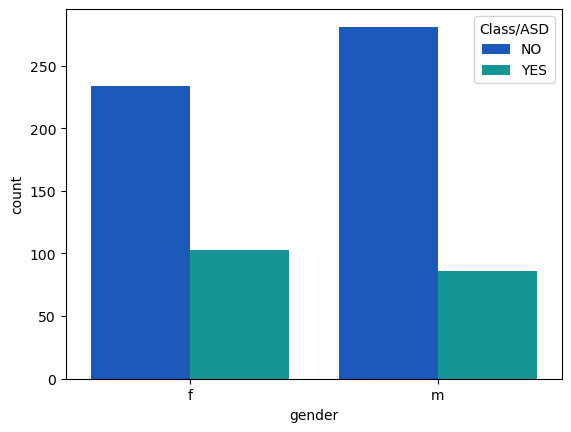

In [40]:
sns.countplot(x='gender',hue='Class/ASD',data=df,palette='winter')

In [97]:
df.Age_Cat=df.Age_Cat.astype(str)

In [98]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
df[numerical_features].head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
0,1,1,1,1,1,0,0,1,1,0,0,6
1,2,1,1,0,1,0,0,0,1,0,1,5
2,3,1,1,0,1,1,0,1,1,1,1,8
3,4,1,1,0,1,0,0,1,1,0,1,6
4,5,1,0,0,0,0,0,0,1,0,0,2


In [99]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in ['id']]

In [103]:
df['Class/ASD'].value_counts()

NO     515
YES    189
Name: Class/ASD, dtype: int64

In [114]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is gender and number of categories are 2
The feature is ethnicity and number of categories are 10
The feature is jundice and number of categories are 2
The feature is austim and number of categories are 2
The feature is contry_of_res and number of categories are 67
The feature is used_app_before and number of categories are 2
The feature is relation and number of categories are 5
The feature is Class/ASD and number of categories are 2
The feature is Age_Cat and number of categories are 5


In [43]:
#Feature Engineering

In [42]:
df.columns

Index(['id', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [46]:
df.age.describe()

count     704
unique     46
top        21
freq       51
Name: age, dtype: object

In [47]:
df.ethnicity.value_counts()
#replace others and Others
#bucket age column
#remove age_desc column

White-European     233
Asian              123
others              96
Middle Eastern      92
Black               43
South Asian         36
Others              30
Latino              20
Hispanic            13
Pasifika            12
Turkish              6
Name: ethnicity, dtype: int64

In [51]:
df.relation.value_counts()

Self                        522
Others                      100
Parent                       50
Relative                     28
Health care professional      4
Name: relation, dtype: int64

In [53]:
df['Class/ASD'].value_counts()

NO     515
YES    189
Name: Class/ASD, dtype: int64

In [68]:
labels=df['Class/ASD']
target=df['Class/ASD'].value_counts()
value=(df['Class/ASD'].value_counts())/len(df['Class/ASD'])*100
class_num=len(target)
fig=px.pie(target,values=value,
           names=target.index,hole=.4, width=500, height=500)
fig.update_traces(textinfo='value+label', pull=0.01)
fig.show()


# From above pie chart we can deduce that data is imbalanced so workflow will be as follows:
1. Feature Engineering (if needed)
2. Feature Encoding
3. Tackle Class Imbalance data
4. Scaling data 
5. Training Model 
6. Evaluating Model 

In [69]:
df.ethnicity.value_counts()
#replace others and Others
#bucket age column
#remove age_desc column

White-European     233
Asian              123
others              96
Middle Eastern      92
Black               43
South Asian         36
Others              30
Latino              20
Hispanic            13
Pasifika            12
Turkish              6
Name: ethnicity, dtype: int64

In [70]:
df['ethnicity']=df['ethnicity'].replace(to_replace="others",value="Others")

In [83]:
bins = [0,17,25,35,60]
category = ['Teen','Adult','Senior Adult','Senior Citizen']
df['Age_Cat'] = pd.cut(df["age"],bins,labels = category)

In [76]:
df['age']=df['age'].astype('int')

In [82]:
df['Age_Cat'].value_counts()

Adult             298
Senior Adult      224
Senior Citizen    160
Teen               18
Name: Age_Cat, dtype: int64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               704 non-null    int64   
 1   A1_Score         704 non-null    int64   
 2   A2_Score         704 non-null    int64   
 3   A3_Score         704 non-null    int64   
 4   A4_Score         704 non-null    int64   
 5   A5_Score         704 non-null    int64   
 6   A6_Score         704 non-null    int64   
 7   A7_Score         704 non-null    int64   
 8   A8_Score         704 non-null    int64   
 9   A9_Score         704 non-null    int64   
 10  A10_Score        704 non-null    int64   
 11  age              704 non-null    int32   
 12  gender           704 non-null    object  
 13  ethnicity        704 non-null    object  
 14  jundice          704 non-null    object  
 15  austim           704 non-null    object  
 16  contry_of_res    704 non-null    object  
 1

In [91]:
df.drop(df.columns[[11,19]], axis=1, inplace=True)

In [121]:
df['Class/ASD'].replace(['NO', 'YES'],[0, 1], inplace=True)

In [122]:
for feature in categorical_features:
    labels_ordered=df.groupby([feature])['Class/ASD'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [123]:
df.head(10)

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD,Age_Cat
0,1,1,1,1,1,0,0,1,1,0,0,1,8,0,0,47,0,6,3,0,3
1,2,1,1,0,1,0,0,0,1,0,1,0,9,0,1,53,0,5,3,0,0
2,3,1,1,0,1,1,0,1,1,1,1,0,9,1,1,55,0,8,1,1,3
3,4,1,1,0,1,0,0,1,1,0,1,1,8,0,1,47,0,6,3,0,3
4,5,1,0,0,0,0,0,0,1,0,0,1,4,0,0,9,0,2,0,0,4
5,6,1,1,1,1,1,0,1,1,1,1,0,4,1,0,47,0,9,3,1,4
6,7,0,1,0,0,0,0,0,1,0,0,1,7,0,0,47,0,2,3,0,2
7,8,1,1,1,1,0,0,0,0,1,0,0,8,0,0,34,0,5,1,0,1
8,9,1,1,0,0,1,0,0,1,1,1,0,8,0,0,47,0,6,3,0,3
9,10,1,1,1,1,0,1,1,1,1,0,0,3,1,1,52,0,8,2,1,2


In [129]:
X=df.drop(['Class/ASD'],axis=1)
y=df['Class/ASD']

In [130]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=21,stratify=y)

In [131]:
scaling_feature=[feature for feature in X_train.columns]
len(scaling_feature)

20

In [132]:
feature_scale=[feature for feature in X_train.columns]
scaler=MinMaxScaler()
scaler.fit(X_train[feature_scale])

MinMaxScaler()

In [133]:
X_train_scaled=scaler.transform(X_train[feature_scale])
X_test_scaled=scaler.transform(X_test[feature_scale])

In [167]:
smote=SMOTEENN()

In [168]:
smote_X_train,smote_y_train=smote.fit_resample(X_train_scaled,y_train)

In [169]:
print('Original Dataset Shape',Counter(y_train))
print('After SMOTE Dataset Shape',Counter(smote_y_train))

Original Dataset Shape Counter({0: 412, 1: 151})
After SMOTE Dataset Shape Counter({1: 404, 0: 370})


In [171]:
rf_1=RandomForestClassifier()
rf_1.fit(smote_X_train,smote_y_train)

RandomForestClassifier()

In [174]:
X_test

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Age_Cat
389,390,0,1,0,0,0,0,0,1,0,0,1,2,0,0,30,0,2,3,0
493,494,1,1,1,1,1,1,1,1,1,1,0,9,0,0,49,0,10,3,3
329,330,0,1,0,0,0,0,1,1,0,0,0,2,0,0,30,0,3,4,0
637,638,1,1,1,1,1,1,1,1,1,1,1,8,0,0,48,0,10,3,0
442,443,0,1,1,1,1,0,1,0,0,1,0,8,0,1,45,0,6,4,3
217,218,1,1,0,0,0,0,0,1,0,1,0,8,0,1,47,0,4,1,4
564,565,0,1,0,0,1,1,0,0,1,0,0,4,0,0,6,1,4,0,0
436,437,1,1,1,1,0,0,0,0,0,1,1,8,0,0,25,0,5,3,0
228,229,0,0,0,1,1,0,1,1,0,1,0,9,0,0,49,0,5,3,0
497,498,0,1,1,1,1,1,1,0,1,1,0,3,0,0,32,0,8,3,3


In [175]:
pred=rf_1.predict(X_test_scaled)

In [199]:
pred=rf_1.predict(X_test_scaled)
print('Train Score: {} '.format(rf_1.score(smote_X_train,smote_y_train)))
print('Test Score :{} '.format(rf_1.score(X_test_scaled,y_test)))

Train Score: 1.0 
Test Score :1.0 


In [177]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        38

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141



In [181]:
cf_matrix=confusion_matrix(y_test,pred)
print(cf_matrix)

[[103   0]
 [  0  38]]


<AxesSubplot:>

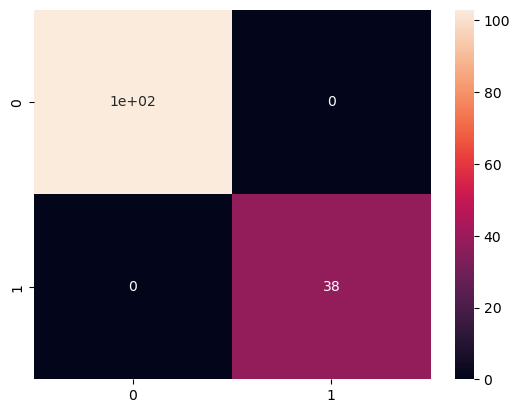

In [182]:
cf_matrix=confusion_matrix(y_test,pred)
sns.heatmap(cf_matrix, annot=True)

<AxesSubplot:>

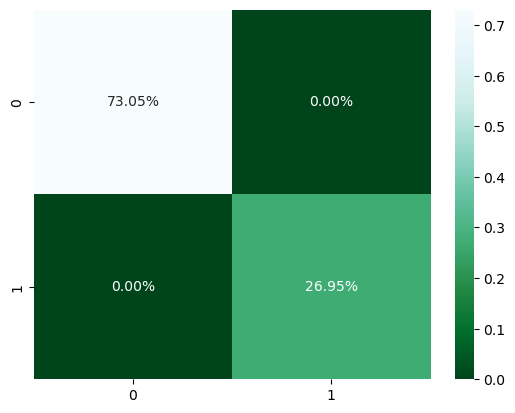

In [215]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='BuGn_r')

In [207]:
y_score=rf_1.predict_proba(X_test_scaled)
y_pred=rf_1.predict(X_test_scaled)

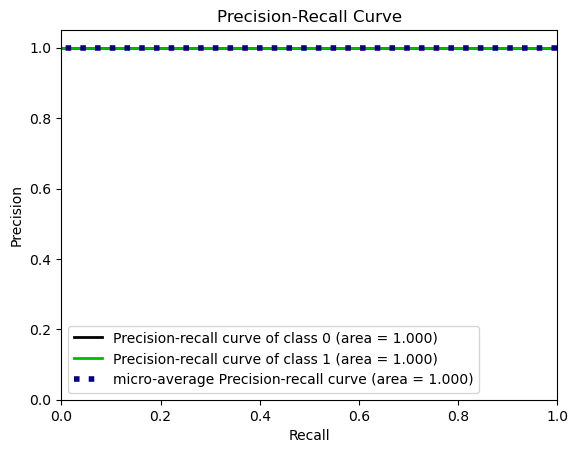

In [213]:
plot_precision_recall(y_test,y_score)
plt.show()

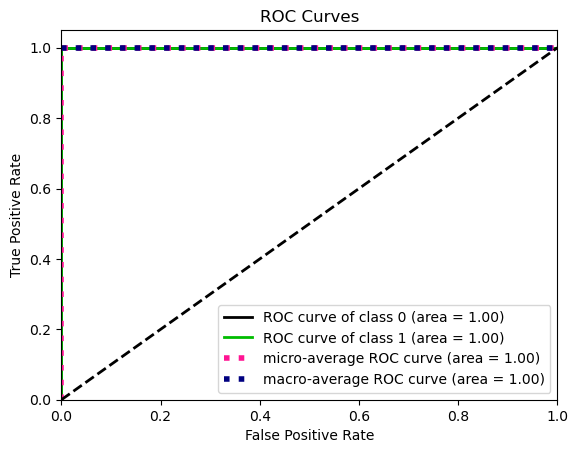

In [212]:
plot_roc(y_test,y_score)
plt.show()

In [203]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

Text(0.5, 0, 'Random Forest Cllassifier Feature Importance')

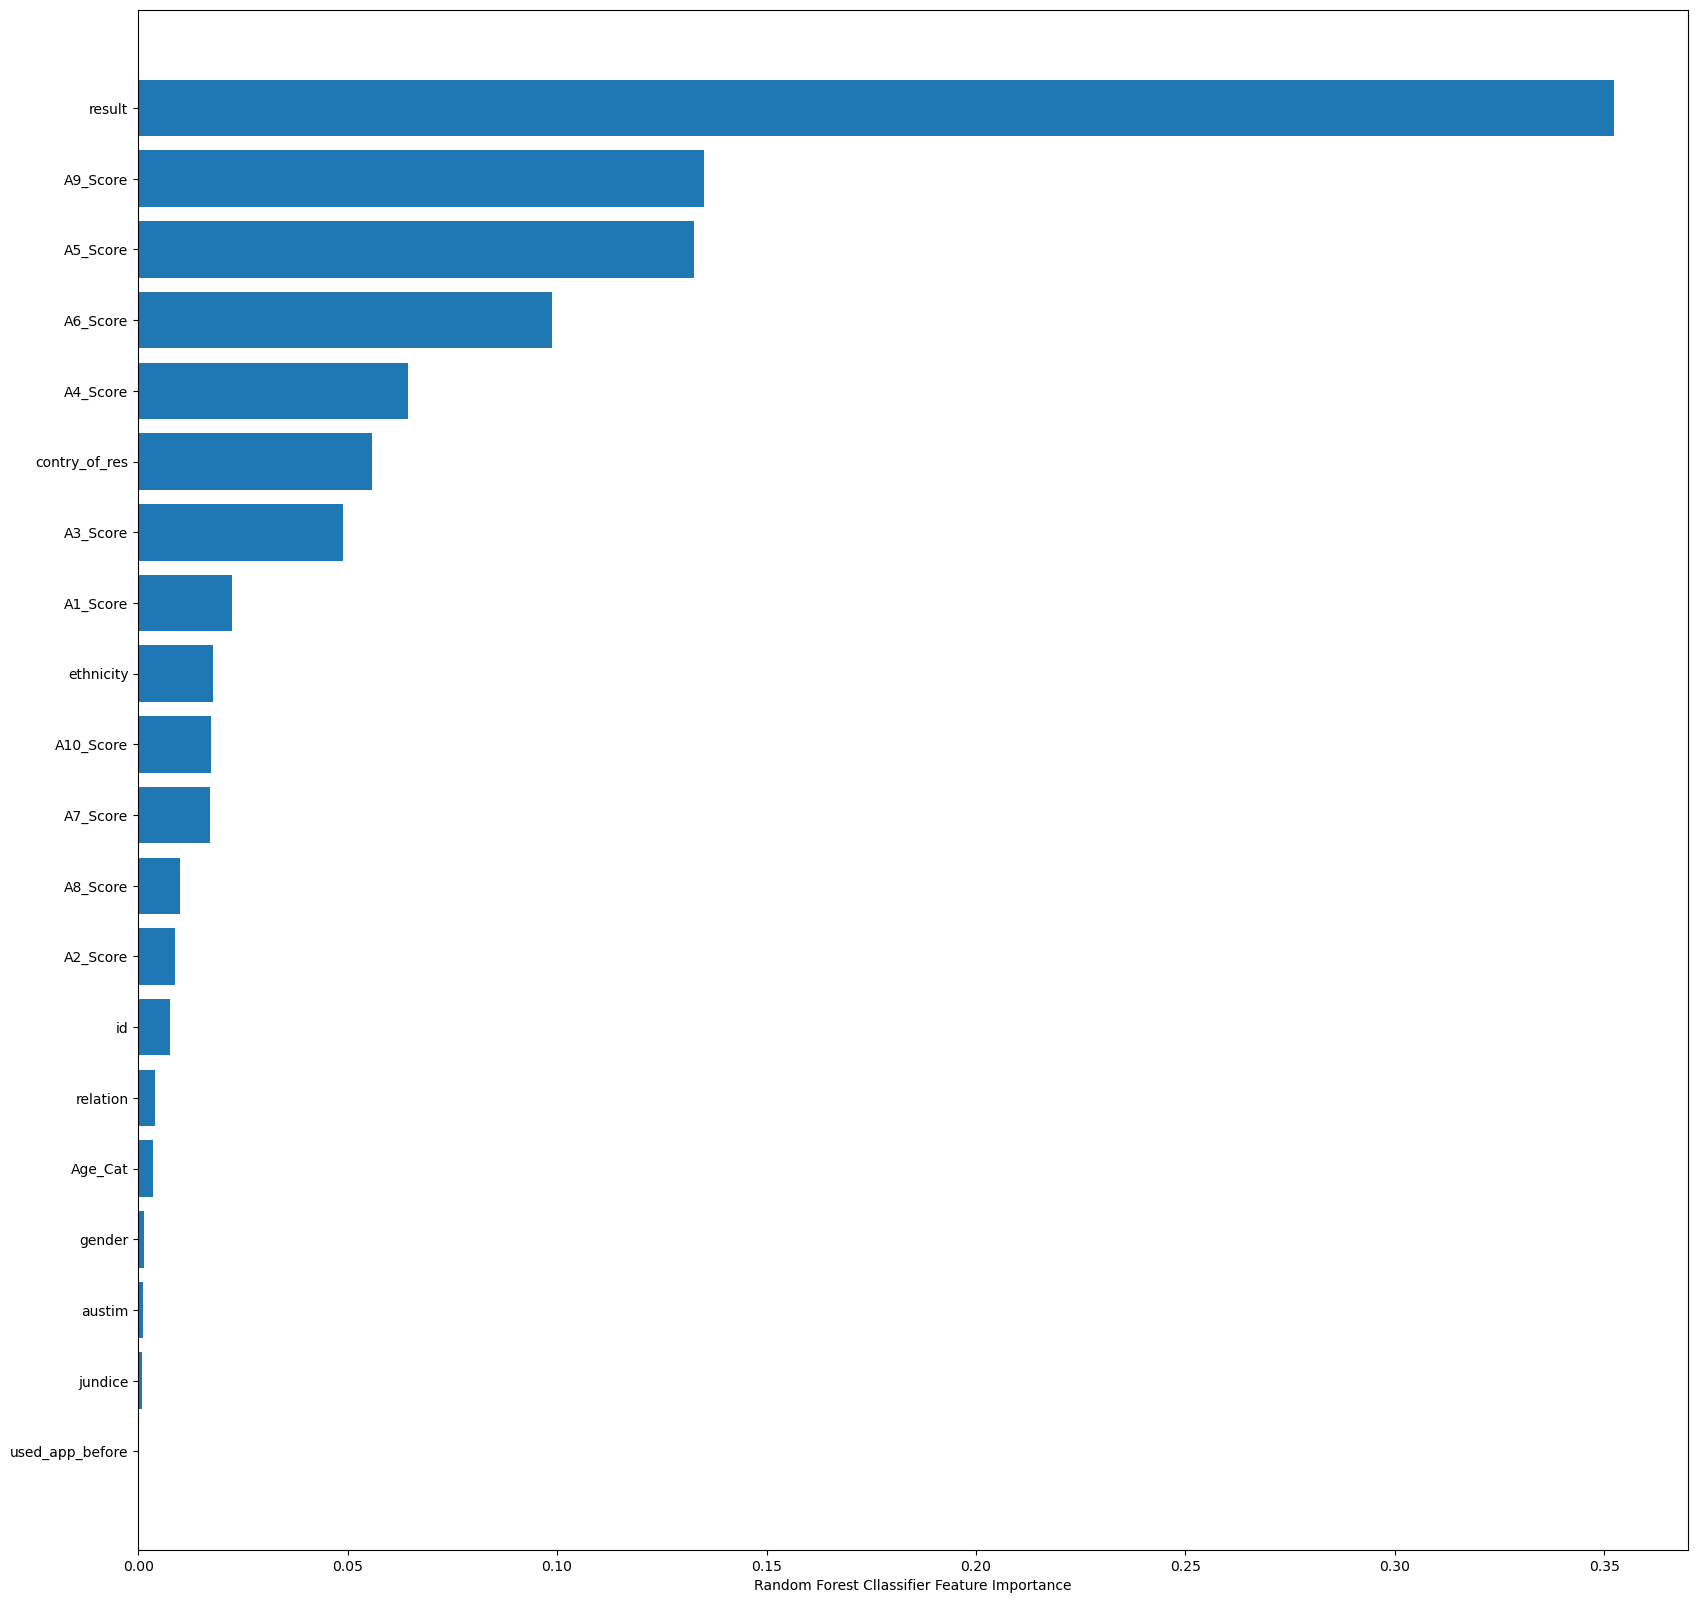

In [202]:
feature_names=X_train.columns
plt.figure(figsize=(20,20))
rf_1.feature_importances_
sorted_idx=rf_1.feature_importances_.argsort()
plt.barh(feature_names[sorted_idx],rf_1.feature_importances_[sorted_idx])
plt.xlabel('Random Forest Cllassifier Feature Importance')